<a href="https://colab.research.google.com/github/dhanshri8625/CODSOFT/blob/main/_CREDIT_CARD_FRAUD_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("creditcard.csv", on_bad_lines='skip')
print(df.head())
print(df['Class'].value_counts())

   Time        V1                   V2        V3        V4        V5  \
0     0 -1.359807  -0.0727811733098497  2.536347  1.378155 -0.338321   
1     0  1.191857     0.26615071205963  0.166480  0.448154  0.060018   
2     1 -1.358354    -1.34016307473609  1.773209  0.379780 -0.503198   
3     1 -0.966272   -0.185226008082898  1.792993 -0.863291 -0.010309   
4     2 -1.158233    0.877736754848451  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V21       V22       V23  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2  1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3  1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4  0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  Class  
0  0.066928  0.12

In [5]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [6]:
df.dropna(inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train_res.value_counts())

Class
0.0    17426
1.0    17426
Name: count, dtype: int64


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4357
         1.0       0.95      0.95      0.95        20

    accuracy                           1.00      4377
   macro avg       0.97      0.97      0.97      4377
weighted avg       1.00      1.00      1.00      4377



In [10]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9999


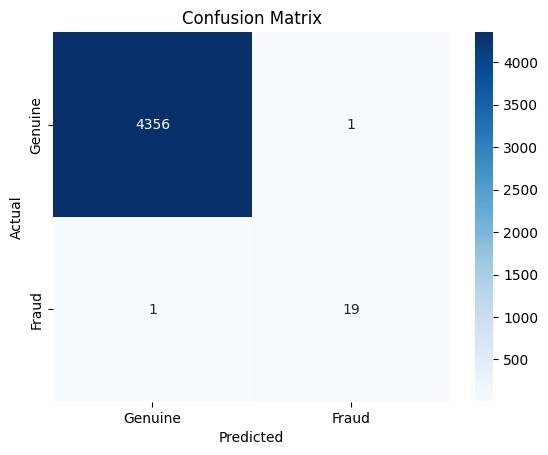

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


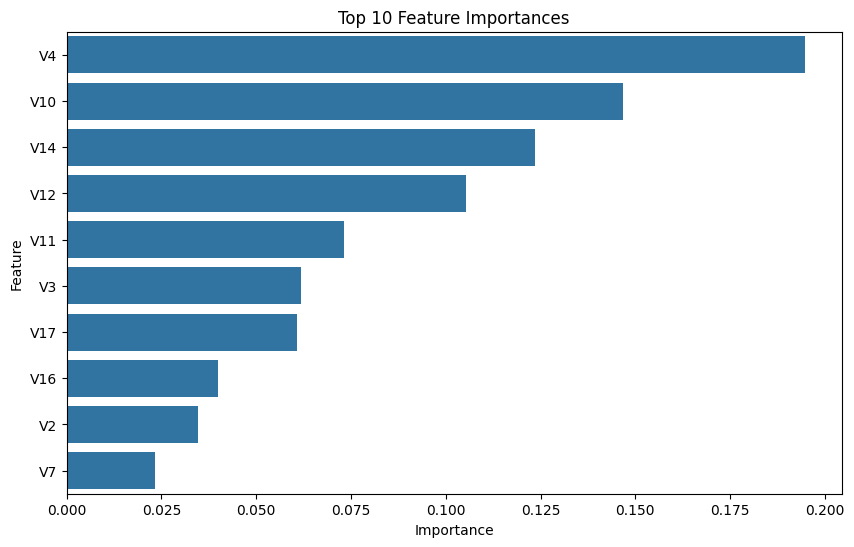

In [12]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

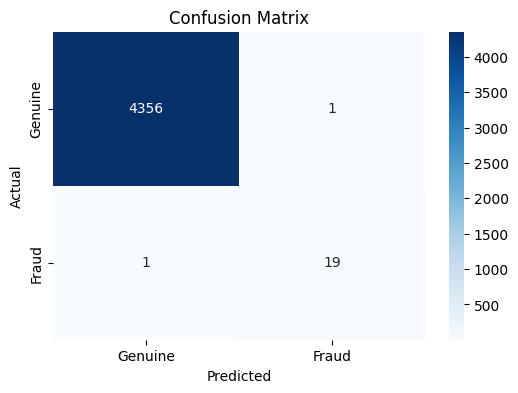

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine','Fraud'],
            yticklabels=['Genuine','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

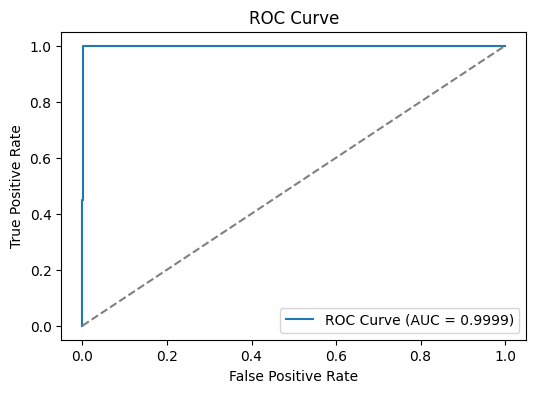

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/tmp/ipython-input-3186844763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


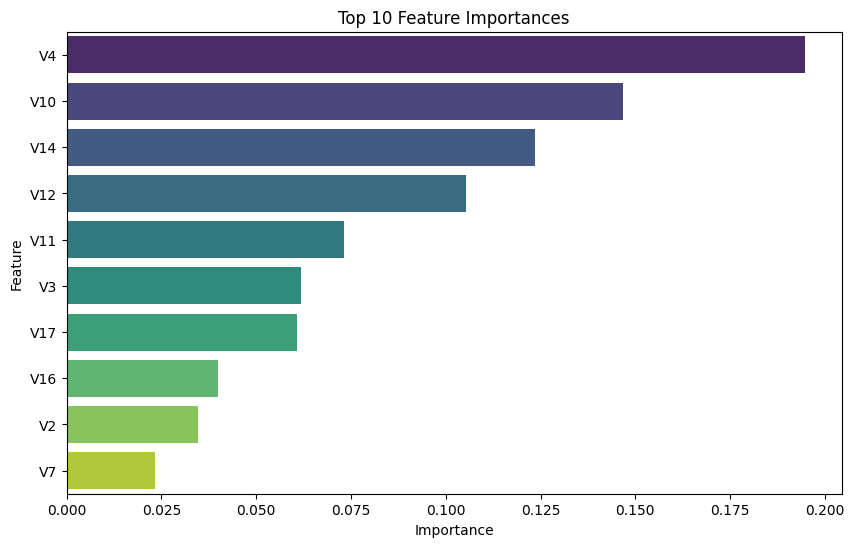

In [15]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df.head(10),
            palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()
